# 1D Infinite potential wall Schrodinger equation solver via python.

This notebook attempts to solve the time independent Schrodinger equation for the 1D potential square well using finite approximation.

A particle exists in a space between a and b of 0 potential, while the potential outside of this region is infinite.

The Schrodinger equation for such system is given by

  $$ - \frac{\hbar^2}{2 m}∇^{2}ψ(x) + Vψ(x)=Eψ (x) $$

  $$
  V = 0 ,\ for \texttt{\char32} a < V < b
  $$ 
  
  $$
  V = \infty ,\ \texttt{\char32}  elsewhere
  $$ 

To solve this in python, we make some finite difference approximations so that the squared gradient operator is represented as

$$
	\frac{\partial^2 f(x)}{\partial x^2} = \frac{f(x + \Delta x) - 2f(x + \Delta x) + f(x - \Delta x)}{\Delta x^2}
$$

In a 1D numpy array, the second derivative at an index can be approximated by by summing the adjacent values minus twice the original value and dividing by the grid spacing squared.

With the wavefunction represented as a numpy array, the Schrodinger equation can be rewritten as follows (Using a 3 x 3 matrix and a size 3 numpy array as an example).

$$
- \frac{\hbar^2}{2 m} \begin{bmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \\ \end{bmatrix} \begin{bmatrix} ψ(0) \\ ψ(1) \\ ψ(2) \\ \end{bmatrix}
$$


In [7]:
#Original Credit: Benjamin Obi Tayo Ph.D.  https://medium.com/@benjaminobi

import numpy as np
import matplotlib.pyplot as plt

First we can specify the bounds of the potential well by entering in values for a and b.  The N is the number of points that will be created in between a and b for calculation purposes.  The higher the N, the higher the resolution of the simulation result will be produced at the cost of more computing time.

In [8]:
a = -5
b = 5
N = 100

x = np.linspace(a,b,N)      #The 1D grid for calculation
h = x[1]-x[0]               #The step size between grid elements or delta x

Next is to construct the Kinetic Energy (T) matrix.  For simplicity and illustrative purposes, all constants including mass and Planck's constant will be ignored and treated as 1.

<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:44: SyntaxWarning: invalid escape sequence '\p'
C:\Users\c0075\AppData\Local\Temp\ipykernel_12572\401229755.py:44: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\psi$(x)',size=14)


(4,)
[ 1.          3.99890652  8.99344032 15.97813999]


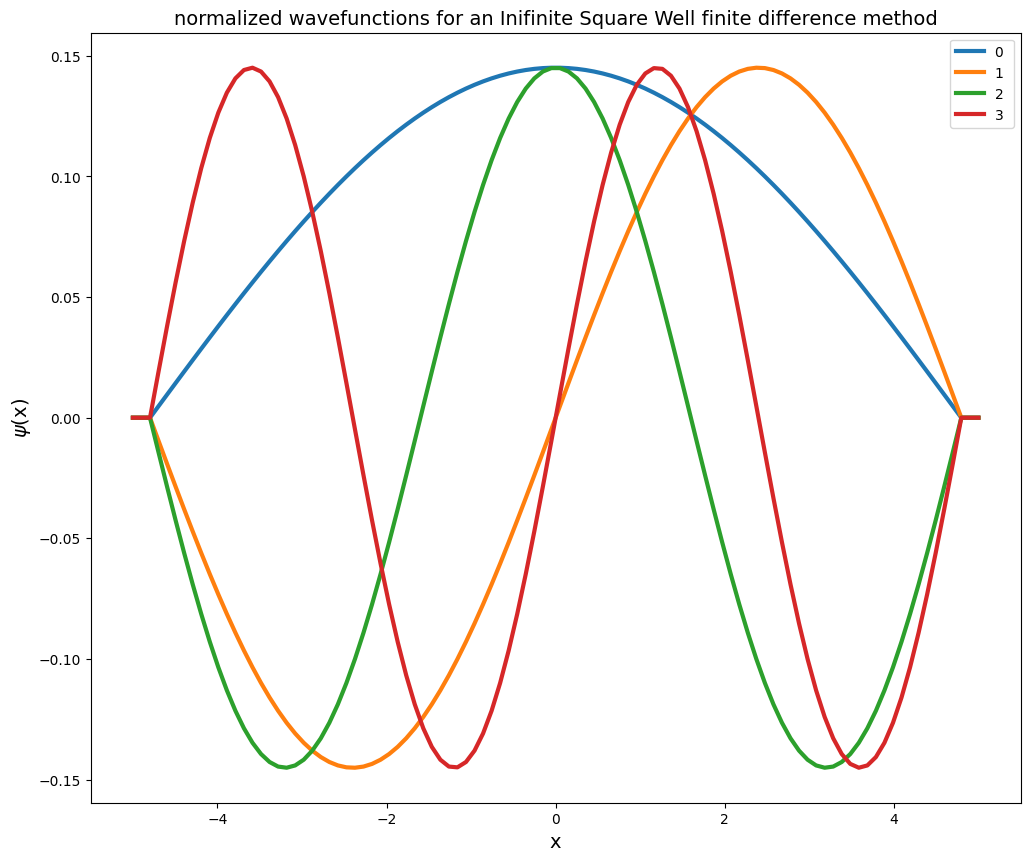

In [9]:

#T matrix
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

#Wall Potential
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            if i > N-5 or i < 2:
                V[i,j] = 999999
            else:
                V[i,j]= 0
        else:
            V[i,j]=0

H = -T/(2*h**2) + V



val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])

plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for an Inifinite Square Well finite difference method',size=14)
plt.show()